# Load Data from the EODC STAC catalogue into Xarray

In [1]:
try:
    from odc import stac as odc_stac
except ImportError:
    %pip install odc-stac
    from odc import stac as odc_stac

try:
    from netCDF4 import Dataset
except ImportError:
    %pip install netCDF4
    from netCDF4 import Dataset

import xarray as xr
import matplotlib.pyplot as plt

from pystac_client import Client

import os
from datetime import datetime

import numpy as np

## Access the catalog and desired collection

First we load the data, we want to load as a Xarray. This is described in the [Data Discorvery Notebook](https://github.com/eodcgmbh/eodc-examples/blob/main/demos/python-stac_DataDiscovery.ipynb).

In [2]:
eodc_catalog = Client.open(
    "https://stac.eodc.eu/api/v1",
)

In [3]:
time_range = "2024-03-01/2024-05-01"

# Bounding box of Austria
bbox_aut = [9.25, 46.31, 17.46, 49.18]

In [4]:
search = eodc_catalog.search(
    collections=["SENTINEL2_L1C"],
    bbox = bbox_aut,
    datetime=time_range
)

print("We found ", search.matched(), " items, that match our filter criteria.")

items = search.items()


We found  14  items, that match our filter criteria.


### Specify Dataset parameters and load into Xarray

In [5]:
crs = "EPSG:4312"
res = 0.00018 # 20 meters in degree 
bands = ["red", "nir"]

In [6]:
#This step can take time
print ("loading data started  : ", datetime.now())
ds = odc_stac.load(items,
                    crs=crs,
                    resolution=res,
                    bbox=bbox_aut,
                    bands = bands,
                       )
print ("loading data completed: ", datetime.now())

loading data started  :  2024-07-04 13:19:36.876273
loading data completed:  2024-07-04 13:49:39.271929


### Save results as netCDF

In [7]:
ds.to_netcdf("./data/stac_xarray.nc")

## Load netCDF

Open the saved NetCDF file.

In [8]:
nc_file = xr.open_dataset("./data/stac_xarray.nc")

In [9]:
red = nc_file['red']
nir = nc_file['nir']

In [10]:
def normalized_difference(x, y):
    nd = (x - y) / (x + y)
    return nd

In [11]:
ndvi = normalized_difference(nir, red)

### Plot the NetCDF Data

Select data for a specific time step and create a plot.

In [12]:
time_data = ndvi.isel(time = 0)

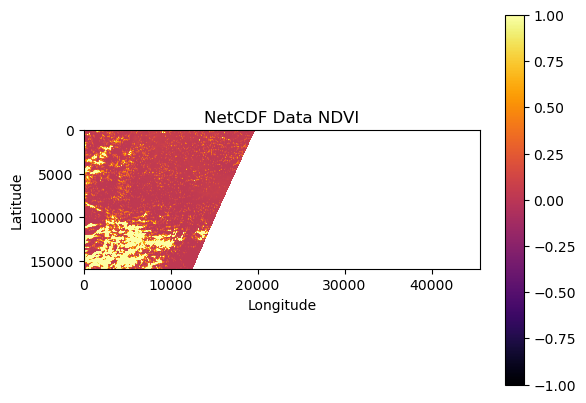

In [15]:
p = plt.imshow(time_data, vmin = -1,  vmax = 1, cmap = "inferno")
plt.colorbar(p)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("NetCDF Data NDVI")
plt.show()

The NetCDF Data is not saved in this github. To create different plots, you need to run the notebook yourself.